# Week 4 Project — Anomaly Detection in Time Series Data (Autoencoder)

Internship Submission — Fully Working on CPU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf


## Download dataset

In [2]:
url='https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv'
df=pd.read_csv(url)
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


## Preprocess

In [3]:
df['value']=df['value'].astype(float)
sc=MinMaxScaler()
data=sc.fit_transform(df[['value']])


## Windowing

In [4]:
win=24
X=[]
for i in range(len(data)-win):
    X.append(data[i:i+win])
X=np.array(X)


## Train Autoencoder on initial normal segment

In [5]:
split=int(0.6*len(X))
X_train=X[:split]
X_test=X[split:]
in_dim=(win,1)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(win,activation='sigmoid'),
    tf.keras.layers.Reshape((win,1))
])
model.compile(optimizer='adam',loss='mse')
h=model.fit(X_train,X_train,epochs=20,batch_size=32,verbose=0)


## Reconstruction error & anomaly threshold

In [6]:
recon=model.predict(X_test)
err=np.mean(np.abs(recon-X_test),axis=(1,2))
th=np.quantile(err,0.99)
labels=err>th
sum(labels)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


np.int64(29)

## Plot results

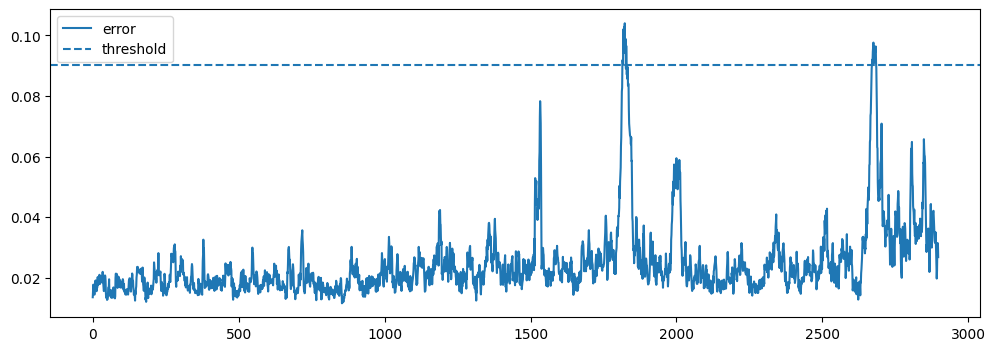

In [7]:
plt.figure(figsize=(12,4))
plt.plot(err,label='error')
plt.axhline(th,ls='--',label='threshold')
plt.legend();